In [1]:
import numpy as np
import updated_library as gbc

import seaborn as sns
sns.set()
#sns.set_style("whitegrid", {'axes.grid' : False})


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
# file paths
three_bumps_family = "../newdat/three_bumps/"

In [3]:
# observables
sph_obs = lambda x: 2*x - np.pi
cha_obs = lambda x, rad, cut: np.clip(a=2*rad/np.tan(x), a_min=-cut, a_max=cut)
#cha_obs = lambda x, rad, cut: cut if 2*rad/np.tan(x)>cut else (-cut if 2*rad/np.tan(x)<-cut else 2*rad/np.tan(x)>cut)
c_ = 5#*(10**5)
knudsen_channel = gbc.channel_var(c_, 1/2)

img_path_ = "../../AllWriteUps/Thesis/imgs/"

In [4]:
h_func = lambda R, r: (2*(R**6) + (r**6)*(-1 + 3*(R**2)) +
                       12*(r**2)*(R**4)*(-1 + 3*(R**2)) + (r**4)*(7*(R**2) - 21*(R**4)))/(24*(R**8))

# Three Bumps

In [5]:
#---first values---#
P_stacks = np.load(three_bumps_family + "p_mats.npy", allow_pickle=False)
params = np.load(three_bumps_family + "keys.npy", allow_pickle=False)
theta_partition = np.load(three_bumps_family + "theta_partition.npy", allow_pickle=False)

In [6]:
F_vec = cha_obs(x=theta_partition, cut=c_, rad=1/2)
sigma_0 = gbc.inner_prod(F_vec, F_vec)

In [7]:
radius_list = params[:,0]

In [8]:
h_vals = np.array([0.0272109, 0.0285056, 0.0298081, 0.0311185, 0.0324366, 0.0337624, \
0.0350959, 0.0364371, 0.0377859, 0.0391424, 0.0405064, 0.0418779, \
0.0432569, 0.0446434, 0.0460374, 0.0474387, 0.0488474, 0.0502635, \
0.0516868, 0.0531174, 0.0545553, 0.0560003, 0.0574525, 0.0589119, \
0.0603783, 0.0618518, 0.0633323, 0.0648199, 0.0663143, 0.0678157, \
0.069324, 0.0708391, 0.072361, 0.0738897, 0.0754252, 0.0769673, \
0.0785161, 0.0800716, 0.0816336, 0.0832022, 0.0847773, 0.0863589, \
0.087947, 0.0895414, 0.0911422, 0.0927494, 0.0943628, 0.0959825, \
0.0976084, 0.0992405, 0.100879, 0.102523, 0.104173, 0.10583, \
0.107492, 0.109161, 0.110835, 0.112515, 0.114201, 0.115893, 0.11759, \
0.119293, 0.121002, 0.122717, 0.124437, 0.126162, 0.127894, 0.12963, \
0.131372, 0.13312, 0.134872, 0.13663, 0.138394, 0.140162, 0.141936, \
0.143715, 0.145499, 0.147288, 0.149082, 0.150881, 0.152685, 0.154493, \
0.156307, 0.158126, 0.159949, 0.161777, 0.163609, 0.165446, 0.167288, \
0.169135, 0.170985, 0.172841, 0.1747, 0.176564, 0.178433, 0.180305, \
0.182182, 0.184064, 0.185949, 0.187838])

In [9]:
h_estimate = ((1/sigma_0)-h_vals)/h_vals
h_estimate;

In [10]:
R = 1.75
y0 = R - np.sqrt(R**2 - (1/4)) 

In [11]:
svar_vals_, cvar_vals_, spectral_gap_ = [], [], []
for P in P_stacks:
    # compute the variance
    svar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition, observable_f=sph_obs)
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                           observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))
    # compute the spectral gap
    spectrum = np.sort(np.real(np.linalg.eigvals(P)))
    second_eig = spectrum[-2]

    # write to inner array
    svar_vals_.append(svar_)
    cvar_vals_.append(cvar_)
    spectral_gap_.append(1-second_eig)
    
svar_vals_, cvar_vals_, spectral_gap_ = np.array(svar_vals_), np.array(cvar_vals_), np.array(spectral_gap_)

In [12]:
s_acc_coeff_, c_acc_coeff_ = svar_vals_/(np.pi**2 - 8), cvar_vals_/sigma_0

### Three Bumps: Spectral Gap

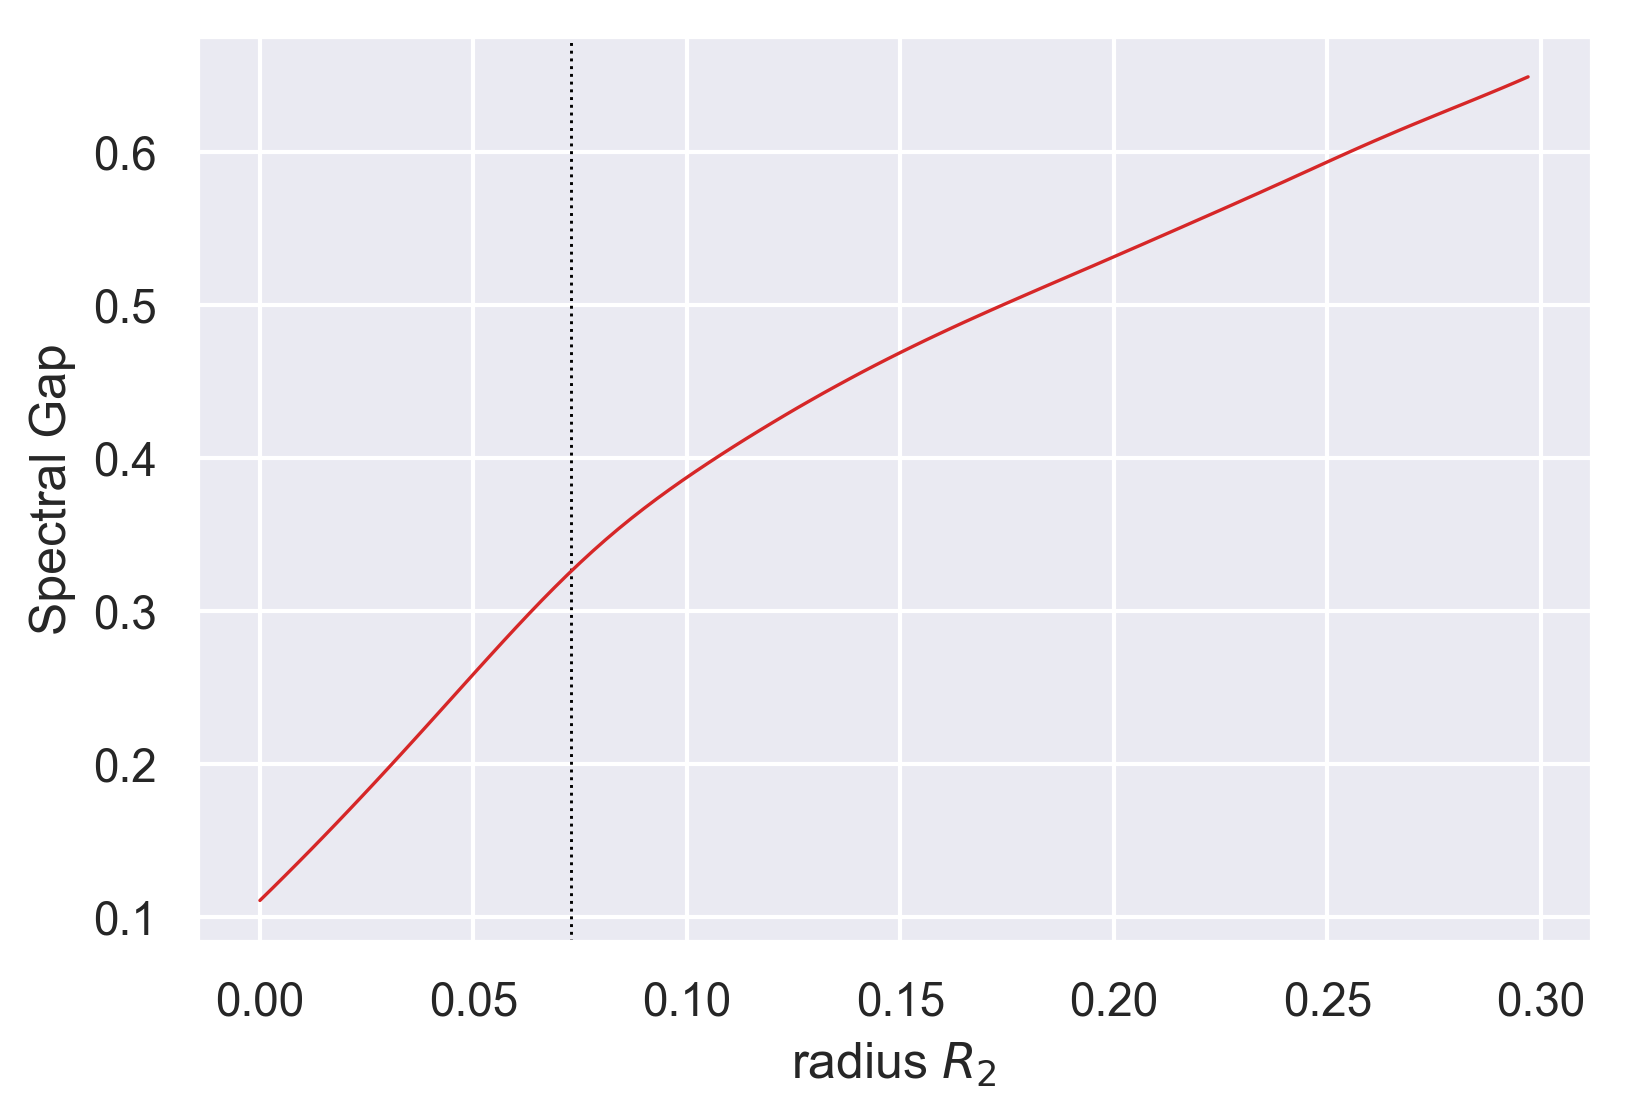

In [13]:
plt.axvline(0.0729, ls=":", c="black", lw=0.7)


plt.plot(
    radius_list,
    spectral_gap_,
    color="tab:red",
    fillstyle="none",
    lw=0.8
)

plt.xlabel(r"radius $R_2$")
plt.ylabel("Spectral Gap")  

#plt.xticks([0,0.05, y0, 0.10, 0.15, 0.20], [0, "",r"$R_1-y_0$", "", 0.15, 0.20])

#plt.title(r"Three bumps family with $R_2=1.75$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig(filename=img_path_+"defense_two_bumps_gap.eps",  bbox_inches='tight')
plt.show()

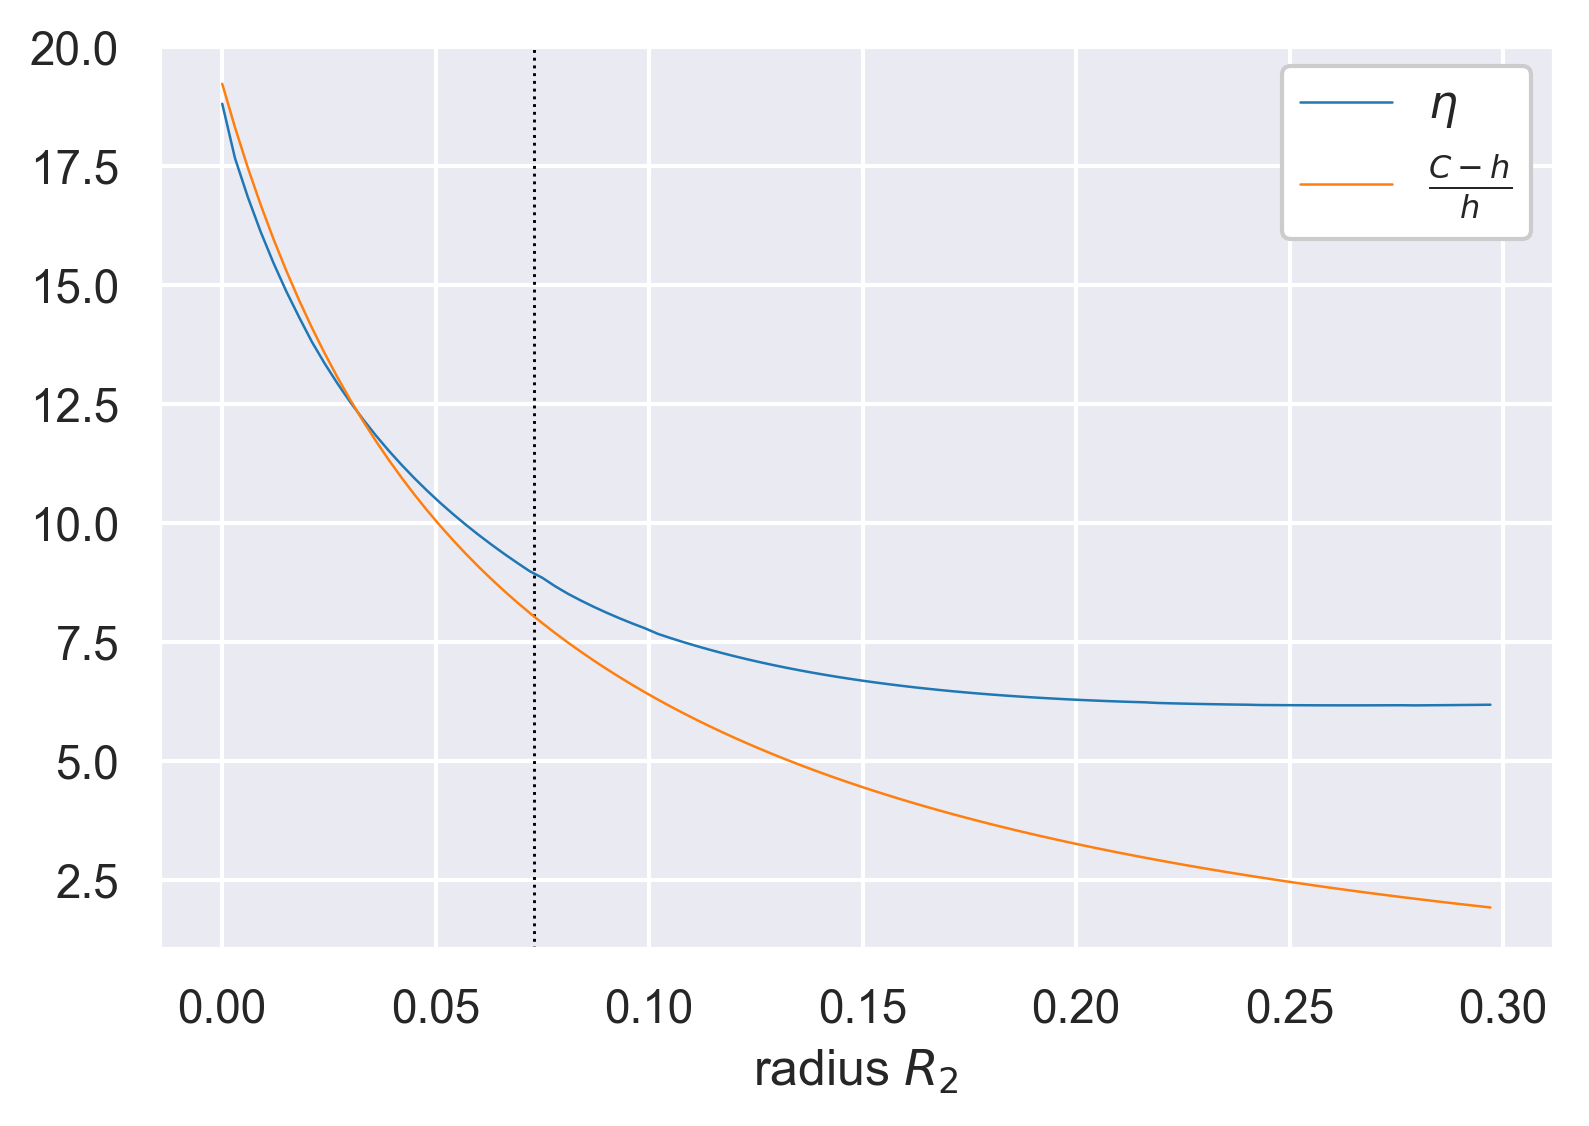

In [16]:
plt.axvline(0.0729, ls=":", c="black", lw=0.7)


plt.plot(
    radius_list,
    c_acc_coeff_+5,
    #label=f"Bumps Family",
    fillstyle="none",
    color="tab:blue",
    linewidth=0.6,
    label=r"$\eta$"
)


plt.plot(
    radius_list,
    h_estimate,
    #label=f"Bumps Family",
    fillstyle="none",
    color="tab:orange",
    linewidth=0.6,
    ls="-",
    label=r"$\frac{C-h}{h}$"
)

plt.xlabel(r"radius $R_2$")

#plt.xticks([0,0.05, y0, 0.10, 0.15, 0.20, 0.25, 0.3], [0, "",r"$R_1 - y_0$", "", 0.15, 0.20, 0.25, 0.3])

#plt.ylabel(r"dimensionless coefficient of self-diffusivity $\eta$")   
#plt.title(r"Three bumps family with $R_1=1.75$")
plt.legend(loc='top left', facecolor="white", framealpha=1)
plt.savefig(filename=img_path_+"defense_two_bumps_eta.eps", bbox_inches='tight')

plt.show()

In [30]:
h_estimate[0], c_acc_coeff_[0]

(19.220379653959615, 13.802108045875867)

In [39]:
knudsen_channel

6.407756778966686

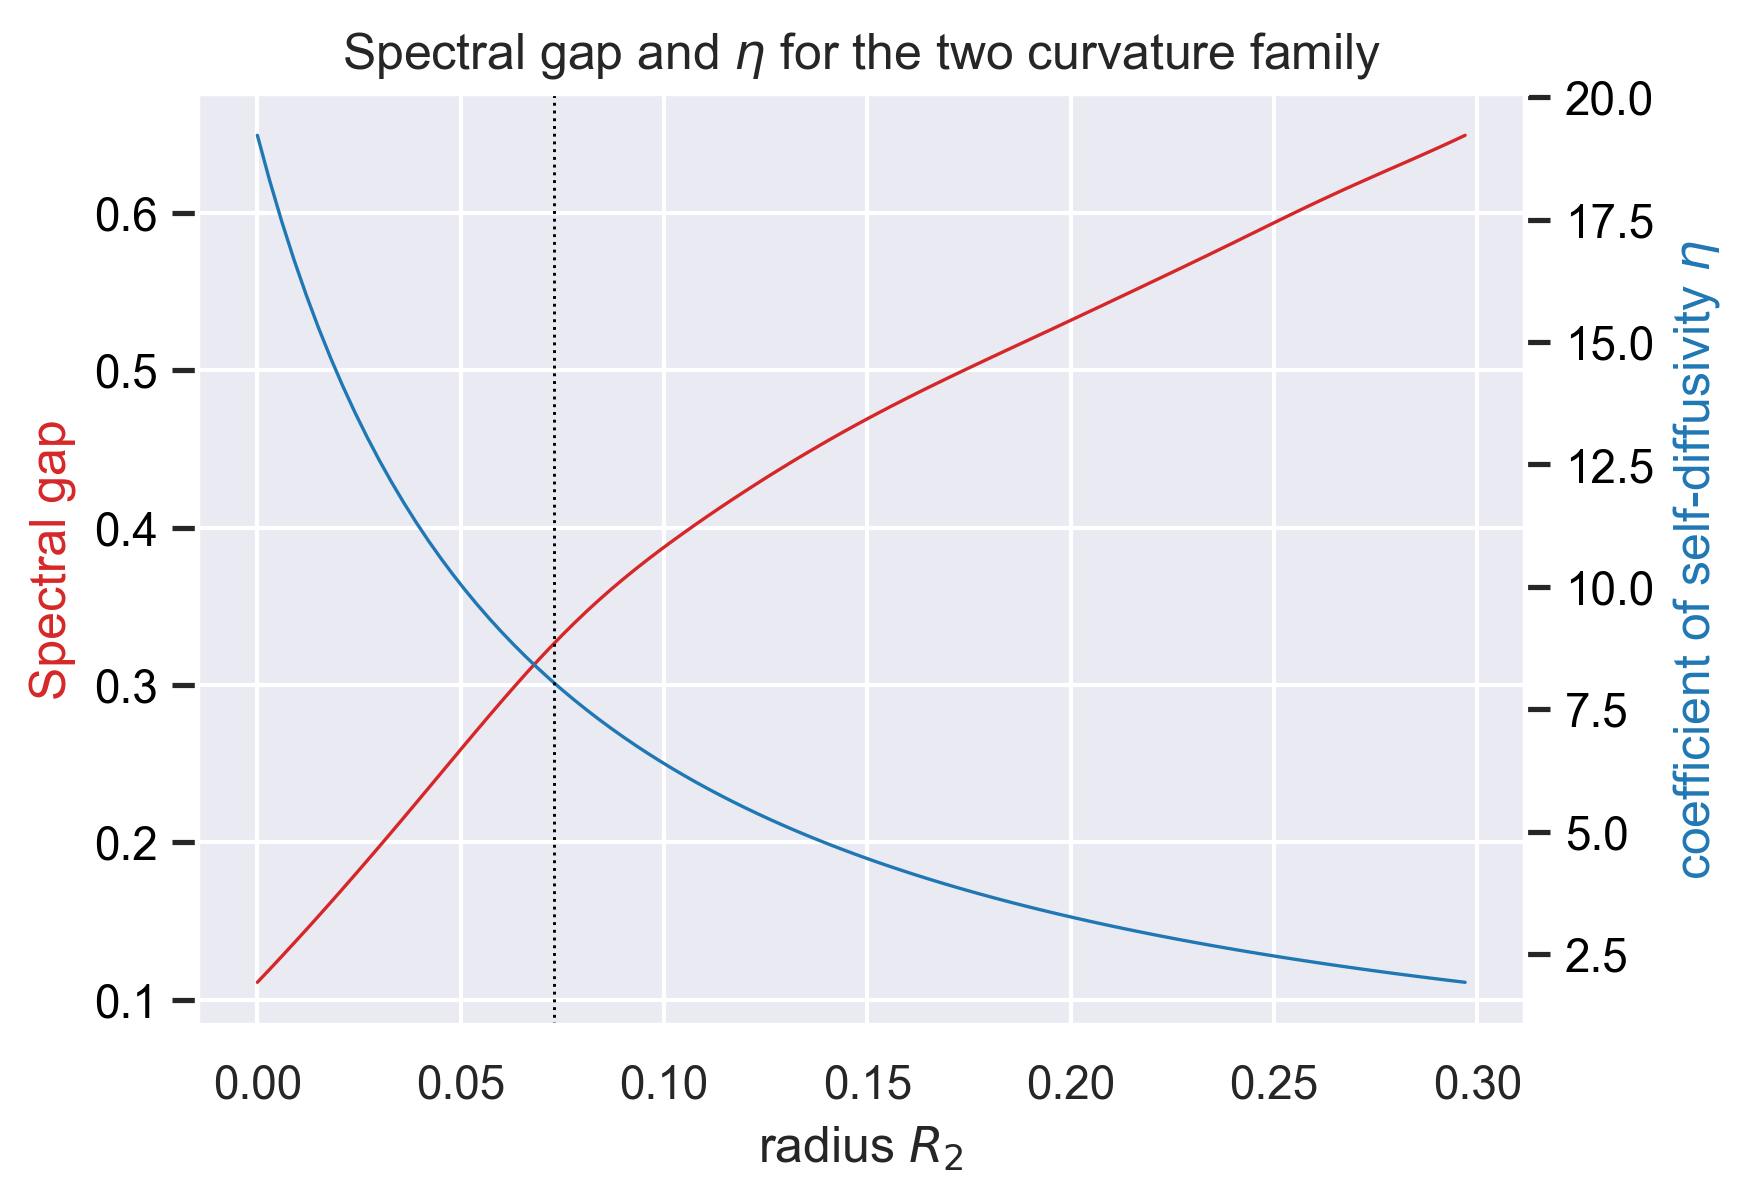

In [44]:
fig, ax1 = plt.subplots()

color = 'tab:red'

plt.xlabel(r"radius $R_2$")
ax1.set_ylabel('Spectral gap', color="tab:red")

A1 = ax1.plot(
    radius_list,
    spectral_gap_,
    color="tab:red",
    label="Spectral gap",
    lw=0.8
)
ax1.tick_params(axis='y', labelcolor="black")
#ax1.legend(loc='center left')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)

ax2.set_ylabel(r'coefficient of self-diffusivity $\eta$', color="tab:blue")  # we already handled the x-label with ax1
A2 = ax2.plot(
    radius_list,
    h_estimate,
    color="tab:blue", 
    lw=0.8,
    label=r"$\eta$"
)
ax2.tick_params(axis='y', labelcolor="black")
#ax2.legend(loc='center right')

# added these three lines
lns = A1+A2
labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc='upper center', facecolor="white", framealpha=1)

plt.axvline(0.0729, ls=":", c="black", lw=0.7)
#plt.xticks([0,0.05, y0, 0.10, 0.15, 0.20, 0.25, 0.3], [0, "",r"$R_1 - y_0$", "", 0.15, 0.20, 0.25, 0.3])



fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title(r"Spectral gap and $\eta$ for the two curvature family")

plt.savefig(filename=img_path_+"defense_two_bumps_both.eps", bbox_inches='tight')
plt.show()